In [1]:
import numpy as np
import random as rd
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import *
from helpFxs import expParas
from os import listdir
import glob

from helpFxs import sample2dist
from helpFxs import findOptim
conditions, delayMaxs, blockMin, blockSec, nBlock, tokenValue, smallReward, iti, pareto, tGrid, kmGrid = expParas()

In [3]:
%qtconsole

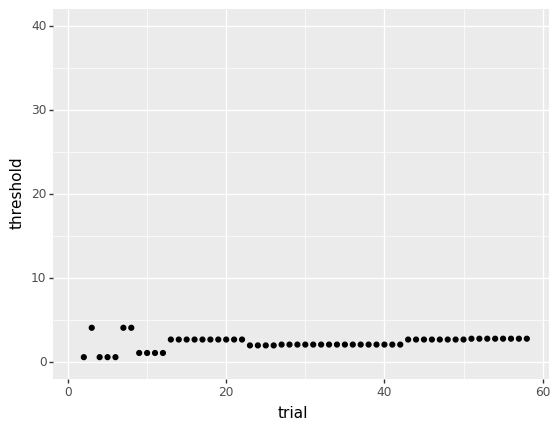

<ggplot: (301579725)>

In [18]:
fileNames = []
for name in glob.glob('../data/*.txt'):
    # print(name)
    fileNames.append(name)

data = pd.read_csv("../data/wtw_stress_SDG2_bk1_1.txt")
data.columns = ['blockNum', 'trialNum', 'trialStartTime', 'nKeyPresses', 'scheduledWait',
                      'rewardTime', 'timeWaited', 'sellTime', 'trialEarnings','totalEarnings']


# loop over trials
delays = data['scheduledWait']
optimThresholds = np.zeros(len(delays))
optimRewardRates = np.zeros(len(delays))

for tIdx in range(len(delays)):
    dist = sample2dist(delays[:(tIdx+1)], delayMaxs[1], step = 0.1)
    optimThresholds[tIdx], optimRewardRates[tIdx] = findOptim(dist)

    
    
plotData = pd.DataFrame.from_dict({
    "trial": np.arange(1, len(delays) + 1),
    "threshold": optimThresholds
})
ggplot(plotData, aes("trial", "threshold")) + geom_point() + ylim([0, 40])

In [5]:
nTrial = len(delays)

accept = True
rewardRate = 0
totalTime = 0
rewardRates = []
for tIdx in range(nTrial):    
    delay = delays[tIdx]
    rewardRate = (rewardRate * totalTime + tokenValue * accept) / (totalTime + delay + iti) # update reward rate
    totalTime = totalTime + delay + iti 
    rewardRates = np.append(rewardRates, rewardRate)
    if tIdx < (nTrial - 1):
        nextDelay = delays[tIdx + 1]
        nextLocalRate = tokenValue / (nextDelay + iti)
        if nextLocalRate >= rewardRate:
            accept = True
        else:
            accept = False